In [326]:
# libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from scipy import stats


# import necessary classes for data preprocessing
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder

# import necessary libriaries for Model Building and Model Evaluation
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import (classification_report,confusion_matrix,cohen_kappa_score,accuracy_score,
                            precision_score,recall_score,roc_auc_score,roc_curve,r2_score,mean_absolute_error,mean_squared_error
                            ,mean_absolute_percentage_error,auc)
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# Importing Pickle for deployment
import pickle

In [327]:
# load dataset
data = pd.read_csv('watches (cleaned).csv',na_values='None')
data.head()  

Brand   Movement Case material Bracelet material  \
0           Alpina     Quartz         Steel            Rubber   
1              Lip        NaN           NaN               NaN   
2  Audemars Piguet  Automatic      Titanium          Titanium   
3           Bulova  Automatic           NaN               NaN   
4     Philip Watch  Automatic   Yellow gold           Leather   

   Year of production          Condition                    Scope of delivery  \
0                 NaN                New        Original box, original papers   
1              1973.0        Used (Good)  No original box, no original papers   
2              2022.0   Used (Very good)        Original box, original papers   
3              1974.0        Used (Fair)  No original box, no original papers   
4                 NaN  Like new & unworn  No original box, no original papers   

               Gender    Price      Availability        Shape  Face Area  \
0  Men's watch/Unisex    895.0  Item is in stock     Circular   759.8800   
1  Men's watch/Unisex    701.0  Item is in stock     Circular   537.3325   
2  Men's watch/Unisex  39825.0  Item is in stock     Circular   692.3700   
3  Men's watch/Unisex    385.0  Item is in stock  Rectangular  1443.0000   
4  Men's watch/Unisex   1718.0  Item is in stock     Circular   566.7700   

   Water resistance           Crystal       Dial Bracelet color       Clasp  \
0              30.0  Sapphire crystal      Black          Black      Buckle   
1               NaN               NaN        NaN            NaN         NaN   
2              10.0  Sapphire crystal       Grey            NaN  Fold clasp   
3               NaN               NaN      Brown            NaN         NaN   
4               NaN               NaN  Champagne          Brown         NaN   

   Watches Sold by the Seller  Active listing of the seller  Fast Shipper  \
0                        20.0                          36.0             0   
1                         NaN                           NaN             0   
2                         2.0                          48.0             0   
3                         NaN                           NaN             0   
4                         NaN                           NaN             0   

   Trusted Seller  Punctuality  Seller Reviews  
0               0            1            15.0  
1               0            0             NaN  
2               1            1             4.0  
3               0            0             NaN  
4               0            0             NaN

In [328]:
data.info()       # Types of variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45024 entries, 0 to 45023
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         43730 non-null  object 
 1   Movement                      41185 non-null  object 
 2   Case material                 38317 non-null  object 
 3   Bracelet material             37207 non-null  object 
 4   Year of production            25731 non-null  float64
 5   Condition                     42972 non-null  object 
 6   Scope of delivery             43730 non-null  object 
 7   Gender                        39207 non-null  object 
 8   Price                         42751 non-null  float64
 9   Availability                  43468 non-null  object 
 10  Shape                         38697 non-null  object 
 11  Face Area                     38643 non-null  float64
 12  Water resistance              21853 non-null  float64
 13  C

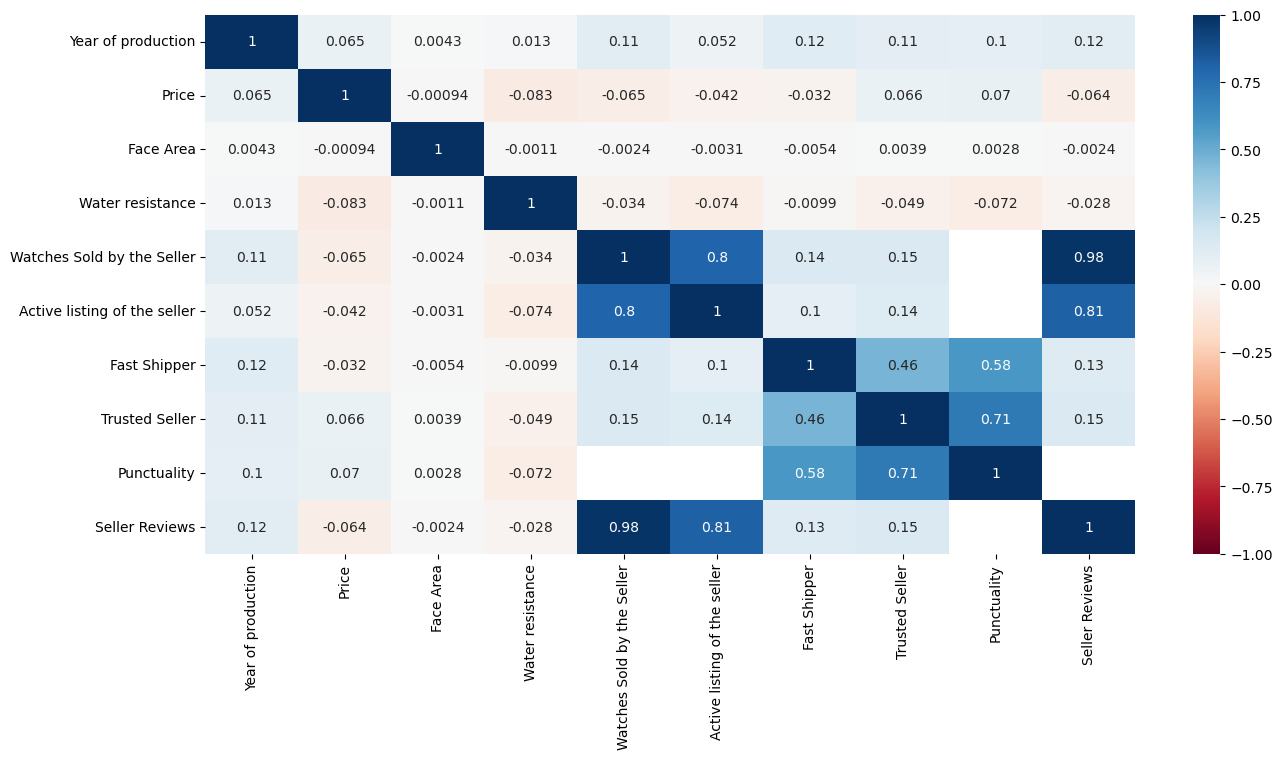

In [329]:
# heatmap for correlation
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(numeric_only=True),vmin=-1,vmax=1,annot=True,cmap='RdBu')
plt.show()

In [330]:
# Numerical and Categorical Columns
num_cols = ['Price','Watches Sold by the Seller','Active listing of the seller','Seller Reviews','Face Area']
cat_cols =['Brand', 'Movement','Case material','Bracelet material','Year of production','Condition'
           ,'Scope of delivery','Gender','Availability','Shape','Water resistance','Crystal','Dial','Bracelet color','Clasp',
          'Fast Shipper','Trusted Seller','Punctuality']

In [331]:
# Number of observations and distribution of variable
for i in data:
    print(i, f' length of variable is {len(data[i].unique())}')
    print(data[i].value_counts(normalize = True))

Brand  length of variable is 480
Brand
Cyma                 0.006792
Concord              0.006769
Squale               0.006723
Cuervo y Sobrinos    0.006700
Revue Thommen        0.006654
                       ...   
Eichmüller           0.000023
Camille Fournet      0.000023
Hirsch               0.000023
Hacher               0.000023
ROWI                 0.000023
Name: proportion, Length: 479, dtype: float64
Movement  length of variable is 6
Movement
Automatic         0.586840
Quartz            0.238024
Manual winding    0.171616
Solar             0.002598
Smartwatch        0.000923
Name: proportion, dtype: float64
Case material  length of variable is 21
Case material
Steel               0.705327
Titanium            0.060026
Rose gold           0.052248
Yellow gold         0.044184
Gold/Steel          0.032884
White gold          0.030561
Ceramic             0.021374
Carbon              0.011039
Platinum            0.008351
Gold-plated         0.007386
Plastic             0.006838
B

In [332]:
data.isnull().sum().sort_values(ascending=False)   # Missing values

Water resistance                23171
Clasp                           19348
Year of production              19293
Crystal                         17924
Bracelet color                  13547
Seller Reviews                  11862
Active listing of the seller    11185
Watches Sold by the Seller      11185
Dial                             8901
Bracelet material                7817
Case material                    6707
Face Area                        6381
Shape                            6327
Gender                           5817
Movement                         3839
Price                            2273
Condition                        2052
Availability                     1556
Scope of delivery                1294
Brand                            1294
Fast Shipper                        0
Trusted Seller                      0
Punctuality                         0
dtype: int64

### UNIVARIATE ANALYSIS

#### Using Boxplot For Visualizing Outliers

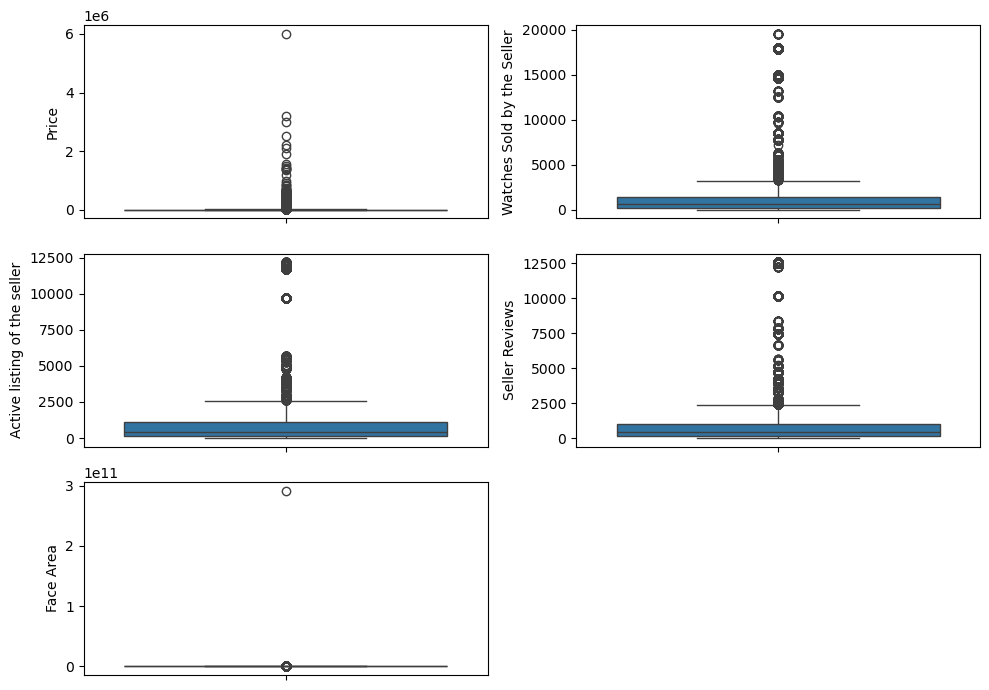

In [335]:
## Checking Numerical Columns
plt.figure(figsize=(10,7))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],fill=True)
    t+=1
plt.tight_layout()
plt.show()

Inferences:
1. Price Column (Target Variable) is Having Extreme Outliers
2. Face Area is also having extreme outliers 
3. Other Numerical Variables are also having some outliers.

#### Using KDEPlot for Checking the Spread of the Data

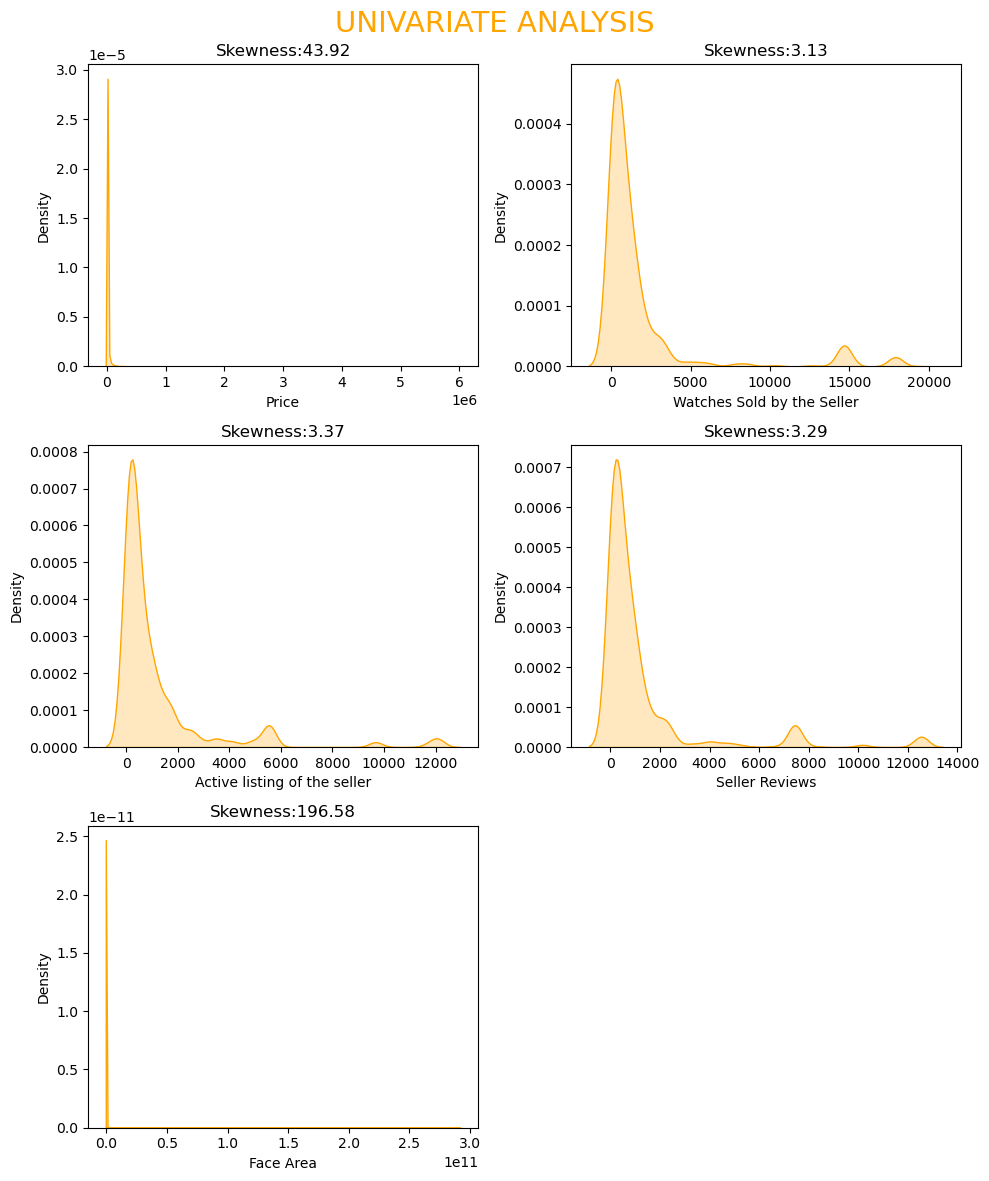

In [338]:
plt.figure(figsize=(10,12))
plt.suptitle('UNIVARIATE ANALYSIS',color='orange',size=21)
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.kdeplot(data[i],fill=True,color='orange')
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

# 📊 **Univariate Analysis - Key Inferences**

###  **Price**  
- Extremely right-skewed (Skewness: **43.92**), indicating a few watches have exceptionally high prices.
- The majority of watches are priced at a much lower range.

###  **Watches Sold by the Seller**  
- Positively skewed (Skewness: **3.13**), meaning most sellers have sold only a small number of watches.
- A few sellers have sold a significantly higher number, creating a long right tail.

###  **Active Listings of the Seller**  
- Right-skewed distribution (Skewness: **3.37**), implying that most sellers have a limited number of active listings.
- A small number of sellers dominate with a large number of active listings.

###  **Seller Reviews**  
- Positively skewed (Skewness: **3.29**), showing that most sellers have a low review count.
- A handful of sellers have accumulated a high number of reviews.

###  **Face Area**  
- Extremely right-skewed (Skewness: **196.58**), meaning most watches have a very small face area.
- A few watches have significantly larger face areas, but they are rare.

---
✅ **Overall Conclusion:**  
- All distributions exhibit **positive skewness**, meaning most values are concentrated on the lower end with a few extreme values pulling the tail right.
- Variables like **Price** and **Face Area** show **extreme skewness**, requiring potential transformations for better analysis.


### Bi-Variate Analysis

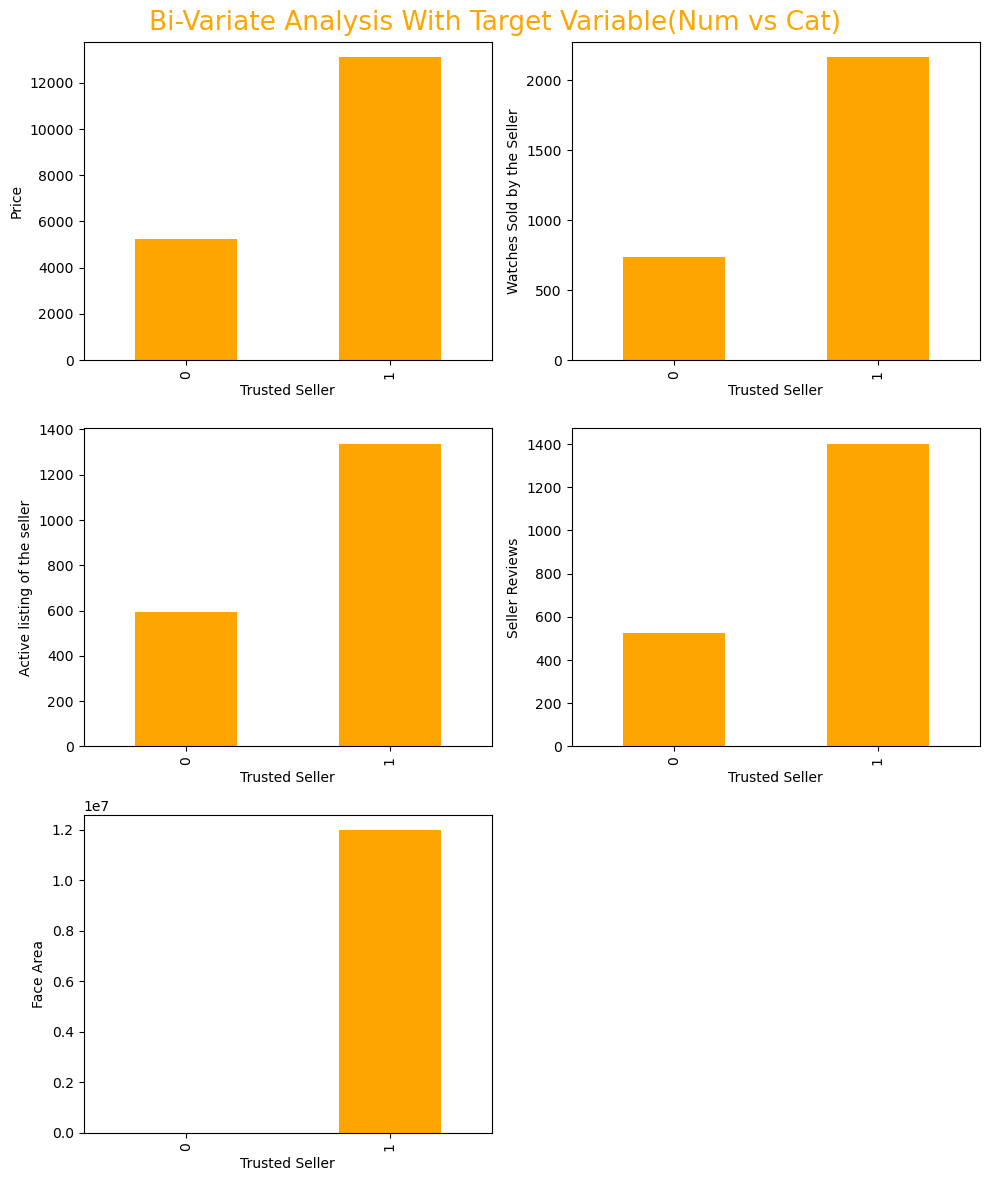

In [341]:
plt.figure(figsize=(10,12))
t=1
plt.suptitle('Bi-Variate Analysis With Target Variable(Num vs Cat)',size=19,color='orange')
for i in num_cols:
    plt.subplot(3,2,t)
    data.groupby(by='Trusted Seller')[i].mean().plot(kind='bar',color='orange')
    plt.ylabel(i)
    t+=1
plt.tight_layout()
plt.show()

# 📊 **Bi-Variate Analysis: Numerical Features vs. Trusted Seller**  

###  **Price vs Trusted Seller**  
- **Trusted sellers (1)** have significantly higher average prices compared to non-trusted sellers (0).  
- This suggests that **trust** plays a crucial role in higher-priced transactions.  

###  **Watches Sold vs Trusted Seller**  
- **Trusted sellers** have sold a much higher number of watches on average.  
- Non-trusted sellers have much lower sales, indicating a strong relationship between trust and sales volume.  

###  **Active Listings vs Trusted Seller**  
- Trusted sellers tend to have a **higher number of active listings** than non-trusted sellers.  
- This suggests that sellers with more listings are more likely to gain a trusted status.  

###  **Seller Reviews vs Trusted Seller**  
- Trusted sellers have **substantially more reviews** than non-trusted sellers.  
- This reinforces the idea that reviews contribute to a seller being marked as trusted.  

###  **Face Area vs Trusted Seller**  
- The average **face area of watches** is significantly higher for trusted sellers.  
- This could indicate that trusted sellers deal in larger or premium watches.  

---
✅ **Overall Conclusion:**  
- Trusted sellers consistently outperform non-trusted sellers in **price, sales, active listings, and reviews**.  
- Being a trusted seller **positively influences customer trust and sales performance**. 🚀  


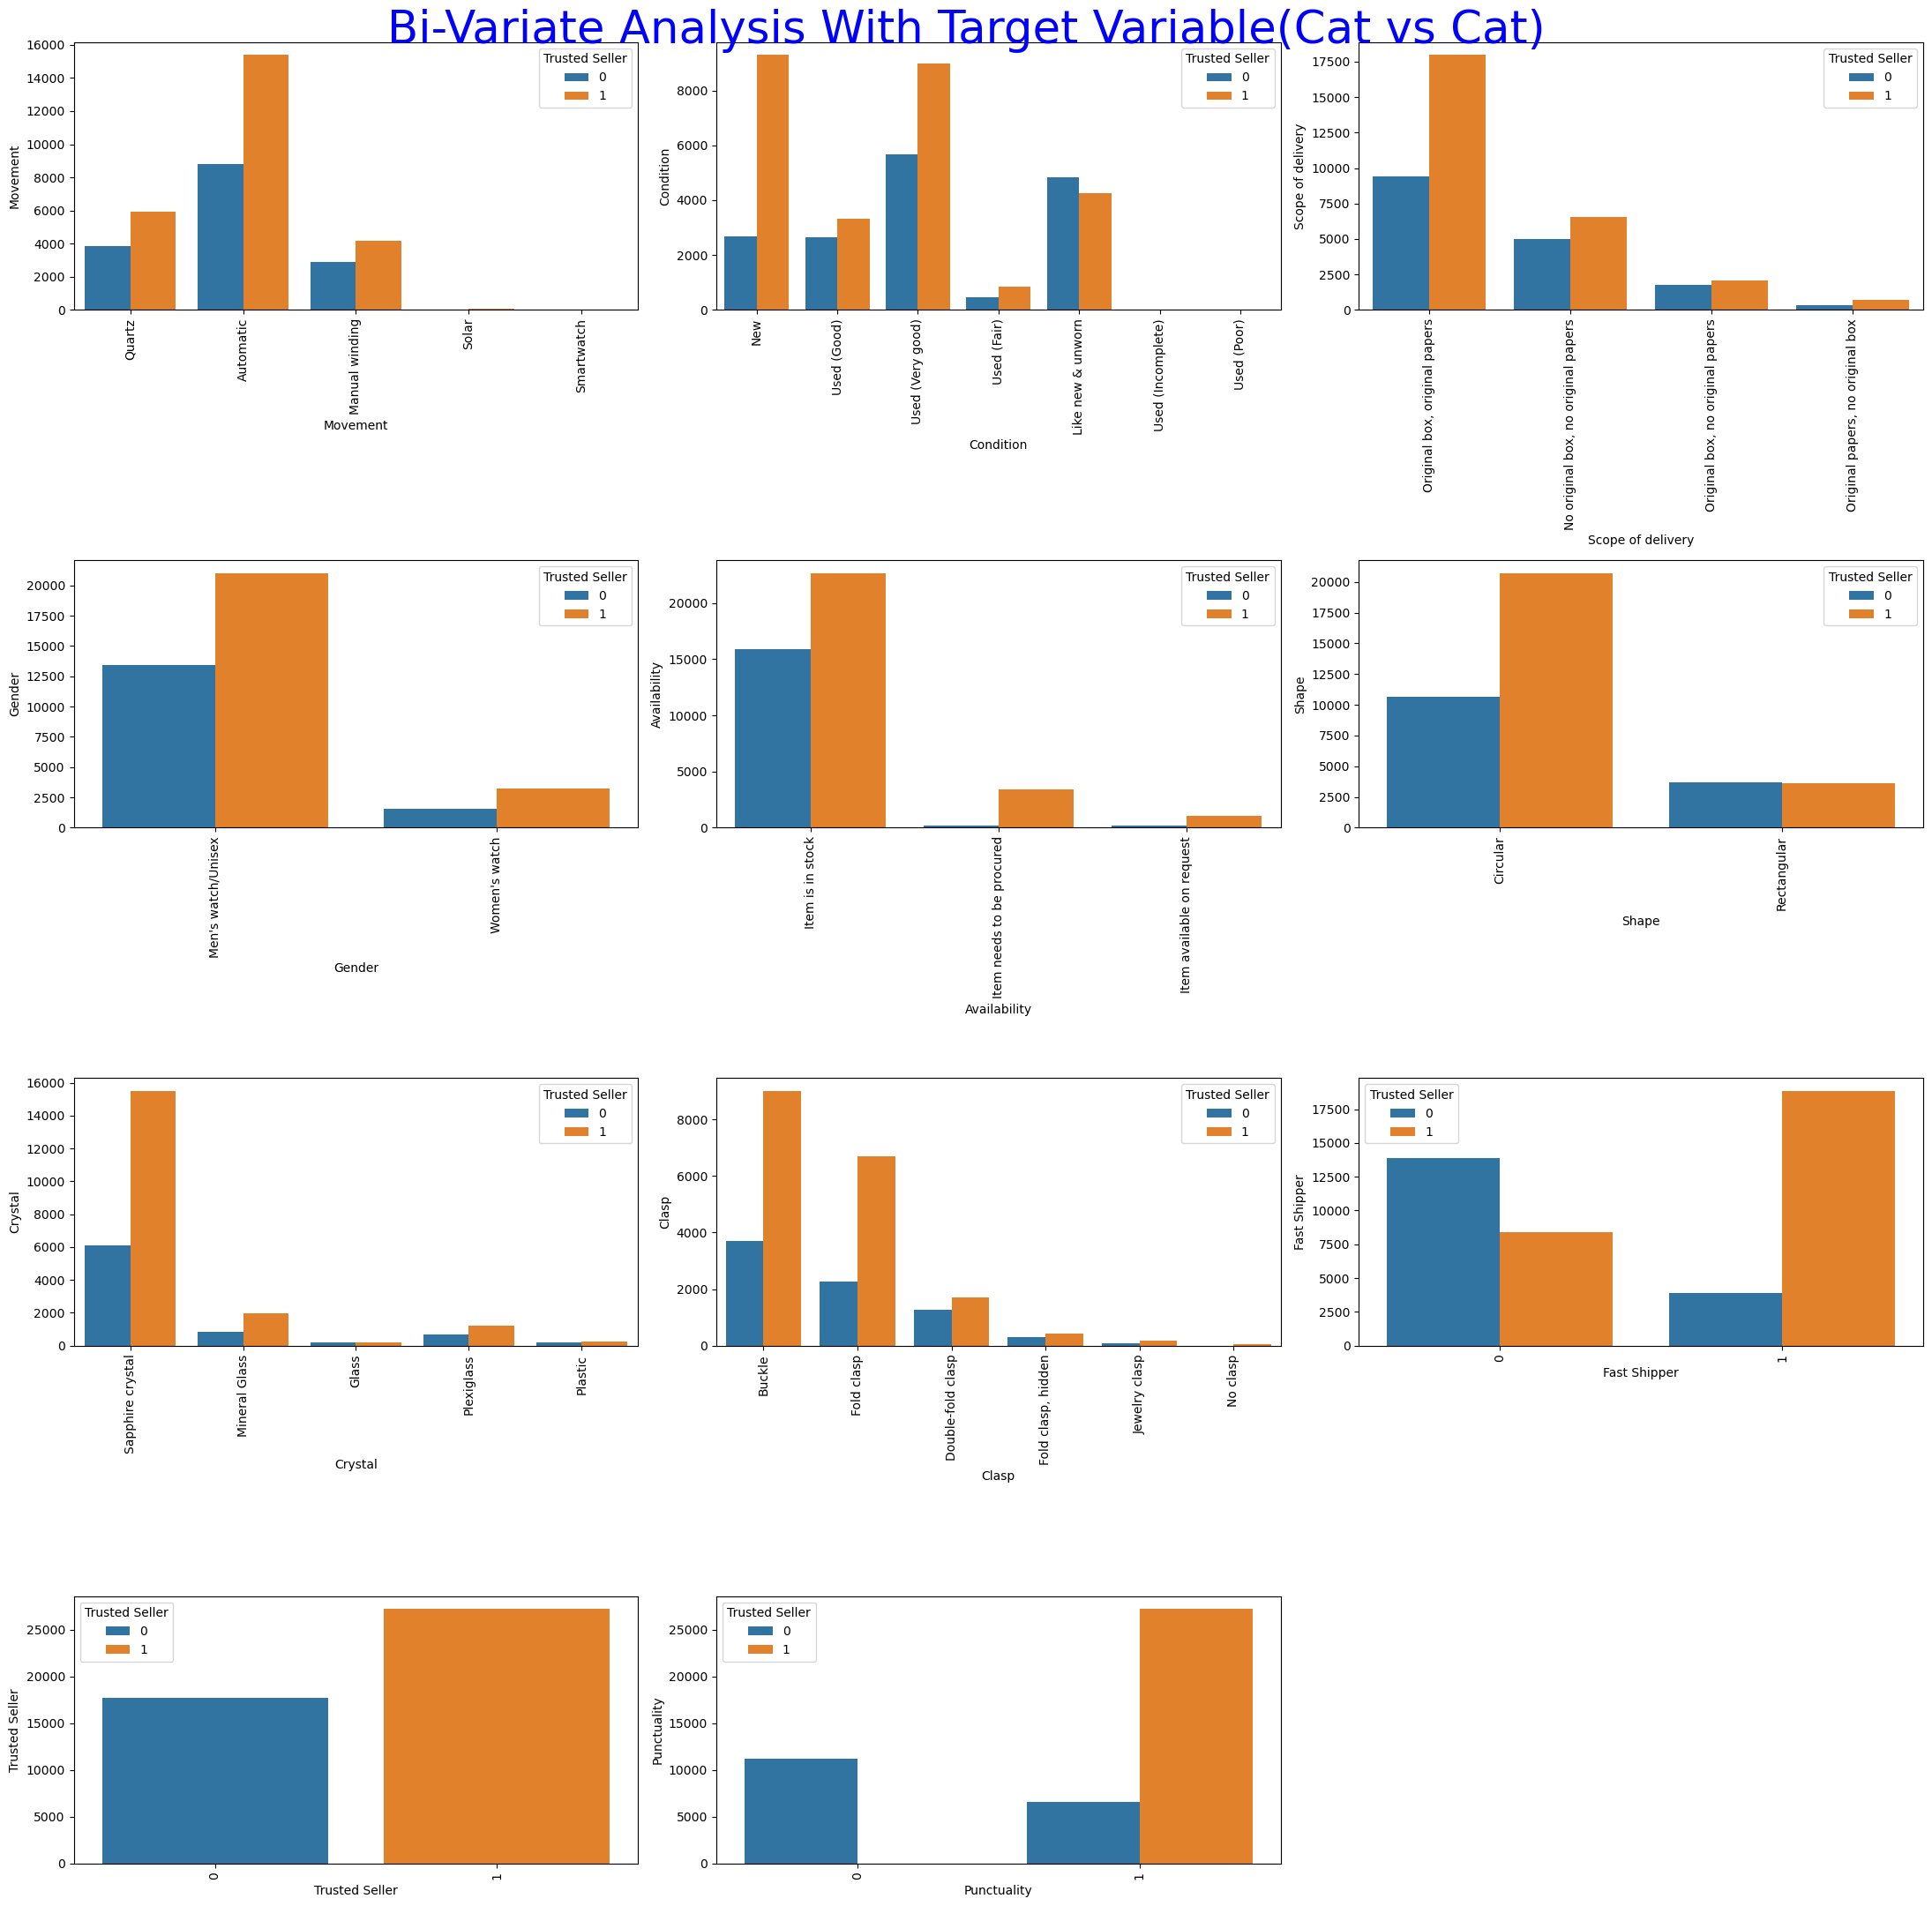

In [343]:
plt.figure(figsize=(22,22))
t=1
plt.suptitle('Bi-Variate Analysis With Target Variable(Cat vs Cat)',size=37,color='blue')
for i in cat_cols:
    if i not in ['Brand','Case material','Bracelet material','Year of production','Water resistance','Dial','Bracelet color']:
        plt.subplot(4,3,t)
        sns.countplot(data=data,hue='Trusted Seller',x=i)
        plt.xticks(rotation=90)
        plt.ylabel(i)
        t+=1
plt.tight_layout()
plt.show()

# 🔍 **Bi-Variate Analysis: Categorical Features vs. Trusted Seller**  

##  **1. Movement vs. Trusted Seller**  
- Trusted sellers deal **mostly in automatic movements**, followed by quartz.
- Non-trusted sellers have a relatively **even distribution** across movement types.

##  **2. Condition vs. Trusted Seller**  
- Trusted sellers have a **higher proportion of new watches**.
- Used watches in **good and very good** condition are also sold more by trusted sellers.
- Non-trusted sellers list more **worn or poor-condition** watches.

##  **3. Scope of Delivery vs. Trusted Seller**  
- Trusted sellers frequently offer **original box & papers**, adding authenticity.
- Non-trusted sellers have a higher count of watches with **no original accessories**.

##  **4. Gender vs. Trusted Seller**  
- Trusted sellers primarily sell **men’s watches**, with a significant difference.
- Women's watches are **less frequently sold overall**, regardless of seller trust level.

##  **5. Availability vs. Trusted Seller**  
- Trusted sellers have a majority of **“Item in Stock”** listings.
- Non-trusted sellers often require **requests for restocking**, affecting reliability.

##  **6. Shape vs. Trusted Seller**  
- Circular watches dominate both categories, but **trusted sellers sell way more**.
- Rectangular watches have a **small share** but are more evenly split.

##  **7. Crystal Type vs. Trusted Seller**  
- Trusted sellers mostly list watches with **sapphire crystal**, indicating higher quality.
- Non-trusted sellers have a more **diverse crystal type distribution**.

##  **8. Clasp Type vs. Trusted Seller**  
- **Fold clasp and buckle** dominate trusted seller listings.
- Non-trusted sellers have a **more varied mix**, including pin buckle and no clasp.

##  **9. Fast Shipper vs. Trusted Seller**  
- Trusted sellers are significantly more likely to be **fast shippers**.
- Non-trusted sellers take longer to fulfill orders.

##  **10. Punctuality vs. Trusted Seller**  
- Trusted sellers have **far better punctuality** in order deliveries.
- Non-trusted sellers have inconsistent **delivery times**.

---

## ✅ **Final Takeaways:**  
- **Trusted sellers provide premium-quality watches** (better movement, materials, and condition).  
- They have **more availability, offer original accessories, and are punctual in delivery**.  
- **Shipping speed and overall trustworthiness** strongly impact seller status.  

## Data Preprocessing

###  Missing Value Treatment

In [347]:
data.drop(data[data['Brand'].isnull()].index,inplace=True)

Here, We have removed rows with null values in the 'Brand' column, as all other data points in these rows were also missing.

Now for the Treatment of Missing Values in Other Columns keeping in mind the Complexity of the Dataset , We will use
Closest Fit Approach to treat the Null Values.

Here in Watch Dataset and Domain "Brand" Column is the most Important Column for Getting the Closest Fit. <br>
Instead of Doing manually for every brand which are more than 400 in Number we have <br>
created few User Defined Functions which will treat the missing values based on brand. <br>
Some Columns we have treated according to the Relationship between the variables.

In [351]:
def closest_fit_imputation(data, column, group_by_column, method='mode'):
    if method == 'mode':
        imputed_values = data.groupby(group_by_column)[column].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
    elif method == 'mean':
        imputed_values = data.groupby(group_by_column)[column].transform('mean')
    elif method == 'median':
        imputed_values = data.groupby(group_by_column)[column].transform('median')
    else:
        raise ValueError("Invalid method. Choose from 'mode', 'mean', or 'median'.")
    # Map imputed values back to missing rows
    data.loc[(data[group_by_column].isin(imputed_values.index)) & (data[column].isnull()), column] = \
        data[group_by_column].map(imputed_values)
    return data
# Impute missing values column by column
columns_to_impute = {
    'Water resistance': 'Case material',
    'Clasp': 'Bracelet material',
    'Year of production': 'Brand',
    'Crystal': 'Case material',
    'Bracelet color': 'Bracelet material',
    'Seller Reviews': 'Trusted Seller',
    'Active listing of the seller': 'Trusted Seller',
    'Watches Sold by the Seller': 'Trusted Seller',
    'Dial': 'Brand',
    'Bracelet material': 'Case material',
    'Case material': 'Brand',
    'Face Area': 'Shape',
    'Shape': 'Brand',
    'Gender': 'Brand',
    'Movement': 'Brand',
    'Price': 'Brand',
    'Condition': 'Brand',
    'Availability': 'Brand',
    'Scope of delivery': 'Brand',
}

for column, group_by in columns_to_impute.items():
    if group_by:
        data = closest_fit_imputation(data, column, group_by, method='mode')

# Check for remaining null values
data.isnull().sum().sort_values(ascending=False)

Face Area                       5033
Bracelet color                  5022
Clasp                           4899
Water resistance                4213
Crystal                         3937
Bracelet material               2951
Year of production                89
Dial                              17
Case material                     14
Shape                             10
Movement                           7
Gender                             5
Punctuality                        0
Trusted Seller                     0
Watches Sold by the Seller         0
Active listing of the seller       0
Fast Shipper                       0
Brand                              0
Availability                       0
Price                              0
Scope of delivery                  0
Condition                          0
Seller Reviews                     0
dtype: int64

In [352]:
data['Face Area']=np.where((data['Face Area'].isnull())&(data['Shape']=='Circular'),data[data['Shape']=='Circular']['Face Area'].median(),
        data['Face Area'])

In [353]:
data['Face Area']=np.where((data['Face Area'].isnull())&(data['Shape']=='Rectangular'),data[data['Shape']=='Rectangular']['Face Area'].median(),
        data['Face Area'])

In [354]:
data.isnull().sum().sort_values(ascending=False)

Bracelet color                  5022
Clasp                           4899
Water resistance                4213
Crystal                         3937
Bracelet material               2951
Year of production                89
Dial                              17
Case material                     14
Shape                             10
Face Area                         10
Movement                           7
Gender                             5
Active listing of the seller       0
Watches Sold by the Seller         0
Trusted Seller                     0
Punctuality                        0
Fast Shipper                       0
Brand                              0
Availability                       0
Price                              0
Scope of delivery                  0
Condition                          0
Seller Reviews                     0
dtype: int64

In [355]:
def impute_bracelet_color(data, brand_col, color_col):
    # Calculate the mode for the color column grouped by brand
    mode_colors = data.groupby(brand_col)[color_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    # Apply the mode to fill missing values in the color column
    data[color_col] = data.apply(
        lambda row: mode_colors[row[brand_col]] if pd.isnull(row[color_col]) else row[color_col], axis=1
    )

In [356]:
impute_bracelet_color(data,'Brand','Bracelet color')

In [357]:
def impute_clasp(data, brand_col, clasp_col):
    # Calculate the mode for the clasp column grouped by brand
    mode_clasps = data.groupby(brand_col)[clasp_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

    # Apply the mode to fill missing values in the clasp column
    data[clasp_col] = data.apply(
        lambda row: mode_clasps[row[brand_col]] if pd.isnull(row[clasp_col]) else row[clasp_col], axis=1
    )

In [358]:
impute_clasp(data,'Brand','Clasp')

In [359]:
def impute_water_resistance(data, brand_col, water_res_col):
    # Calculate the mode for the water resistance column grouped by brand
    mode_water_res = data.groupby(brand_col)[water_res_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    # Apply the mode to fill missing values in the water resistance column
    data[water_res_col] = data.apply(
        lambda row: mode_water_res[row[brand_col]] if pd.isnull(row[water_res_col]) else row[water_res_col], axis=1
    )

In [360]:
impute_water_resistance(data,'Brand','Water resistance')

In [361]:
def impute_crystal(data, brand_col, crystal_col):
    # Calculate the mode for the crystal column grouped by brand
    mode_crystals = data.groupby(brand_col)[crystal_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

    # Apply the mode to fill missing values in the crystal column
    data[crystal_col] = data.apply(
        lambda row: mode_crystals[row[brand_col]] if pd.isnull(row[crystal_col]) else row[crystal_col], axis=1
    )

In [362]:
impute_crystal(data,'Brand','Crystal')

In [363]:
def impute_bracelet_material(data, brand_col, material_col):
    # Calculate the mode for the bracelet material column grouped by brand
    mode_materials = data.groupby(brand_col)[material_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

    # Apply the mode to fill missing values in the bracelet material column
    data[material_col] = data.apply(
        lambda row: mode_materials[row[brand_col]] if pd.isnull(row[material_col]) else row[material_col], axis=1
    )

In [364]:
impute_bracelet_material(data,'Brand','Bracelet material')

Here We have Used Mode imputation in User Defined Functions using Closest Fit for Every Column using Brand.

In [366]:
data.dropna(inplace=True)

In [367]:
data.isnull().sum()

Brand                           0
Movement                        0
Case material                   0
Bracelet material               0
Year of production              0
Condition                       0
Scope of delivery               0
Gender                          0
Price                           0
Availability                    0
Shape                           0
Face Area                       0
Water resistance                0
Crystal                         0
Dial                            0
Bracelet color                  0
Clasp                           0
Watches Sold by the Seller      0
Active listing of the seller    0
Fast Shipper                    0
Trusted Seller                  0
Punctuality                     0
Seller Reviews                  0
dtype: int64

### Outlier Detection and Treatment

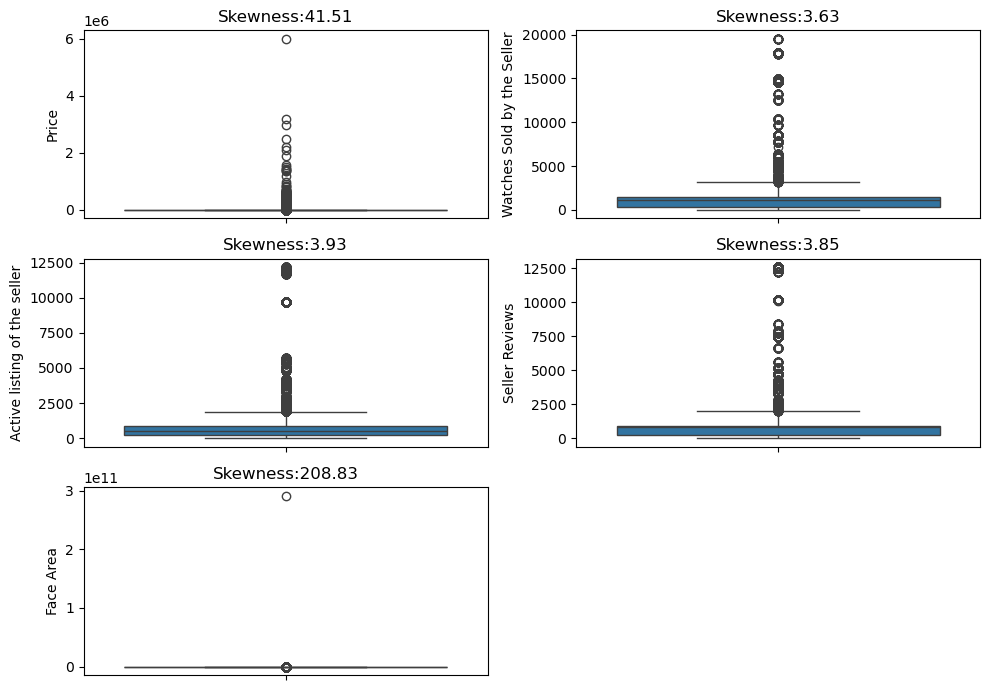

In [369]:
## Checking Numerical Columns
plt.figure(figsize=(10,7))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],fill=True)
    t+=1
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
plt.tight_layout()
plt.show()

In [370]:
num_cols = ['Watches Sold by the Seller',
 'Active listing of the seller',
 'Seller Reviews','Face Area']

for i in num_cols:
    Q1 = data[i].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[i].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Calculating Upper and Lower Limits Keeping k=1.5
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[i] = data[i].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

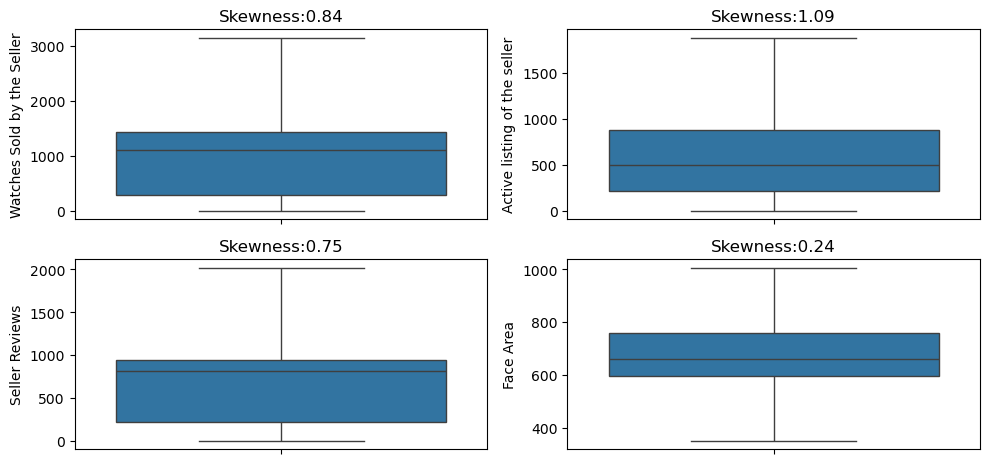

In [371]:
## boxplot for checking the outliers
plt.figure(figsize=(10,7))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],fill=True)
    t+=1
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
plt.tight_layout()
plt.show()

Here we have Capped the Extreme Outliers with the Upper Limit itself,Excluding the Column 'Price' because Price we cannot change in a luxury watch segment. We will Treat it before Model Building.

### Duplicates

In [374]:
data.duplicated().sum()

375

There are 375 Duplicate rows in the data.. we will drop these rows.

In [376]:
data.drop_duplicates(inplace=True)

In [377]:
data.duplicated().sum()

0

## Feature Engineering

In [379]:
# Number of unique observations and there counts to decide which encoding to perform
for i in cat_cols:
    print(i,data[i].nunique())
    print(data[i].value_counts(normalize=True))

Brand 439
Brand
Concord               0.006823
Squale                0.006731
Norqain               0.006685
Audemars Piguet       0.006615
Citizen               0.006615
                        ...   
Zeitwinkel            0.000023
Lindburgh + Benson    0.000023
Leinfelder            0.000023
Momentum              0.000023
ROWI                  0.000023
Name: proportion, Length: 439, dtype: float64
Movement 5
Movement
Automatic         0.584818
Quartz            0.243512
Manual winding    0.168247
Solar             0.002452
Smartwatch        0.000971
Name: proportion, dtype: float64
Case material 20
Case material
Steel               0.724453
Titanium            0.056460
Rose gold           0.050816
Yellow gold         0.040778
Gold/Steel          0.030740
White gold          0.028380
Ceramic             0.020956
Carbon              0.009668
Platinum            0.007702
Gold-plated         0.006523
Plastic             0.006060
Bronze              0.005597
Silver              0.004302
R

In [380]:
df=data.copy()   # Creating a Copy of the Data in which Encoding will be Performed.

In [381]:
# Label Encoding for 'Movement'
df['Movement'] = df['Movement'].astype('category').cat.codes

In [382]:
# Frequency Encoding for 'Case Material'
case_material_counts = df['Case material'].value_counts(normalize=True)
df['Case material'] = df['Case material'].map(case_material_counts)

In [383]:
# Frequency Encoding for 'Bracelet Material'
bracelet_material_counts = df['Bracelet material'].value_counts(normalize=True)
df['Bracelet material'] = df['Bracelet material'].map(bracelet_material_counts)

In [384]:
# Ordinal Encoding for 'Condition'
condition_mapping = {'New': 4, 'Like new & unworn': 3, 'Used (Very good)': 2, 'Used (Good)': 1, 'Used (Fair)': 0}
df['Condition'] = df['Condition'].map(condition_mapping)

In [385]:
# Label Encoding for 'Scope of Delivery'
df['Scope of delivery'] = df['Scope of delivery'].astype('category').cat.codes

In [386]:
# Encoding for 'Gender'
gender_mapping = {"Men's watch/Unisex": 2, 'Unisex': 1, "Women's watch": 0}
df['Gender'] = df['Gender'].map(gender_mapping)

In [387]:
# Ordinal Encoding for 'Availability'
availability_mapping = {'Item is in stock': 2, 'Item needs to be procured': 1, 'Item available on request': 0}
df['Availability'] = df['Availability'].map(availability_mapping)

In [388]:
# Label Encoding for 'Shape'
df['Shape'] = df['Shape'].astype('category').cat.codes

In [389]:
# Ordinal Encoding for 'Crystal' (Sapphire > Mineral glass > Plexiglass > Plastic > Glass)
crystal_mapping = {'Sapphire crystal': 4, 'Mineral Glass': 3, 'Plexiglass': 2, 'Plastic': 1, 'Glass': 0}
df['Crystal'] = df['Crystal'].map(crystal_mapping)

In [390]:
# Frequency Encoding for 'Dial'
dial_counts = df['Dial'].value_counts(normalize=True)
df['Dial'] = df['Dial'].map(dial_counts)

In [391]:
# Frequency Encoding for 'Bracelet Color'
bracelet_color_counts = df['Bracelet color'].value_counts(normalize=True)
df['Bracelet color'] = df['Bracelet color'].map(bracelet_color_counts)

In [392]:
# Ordinal Encoding for 'Clasp' (Buckle > Fold clasp > Double-fold clasp > Fold clasp, hidden > Jewelry clasp > No clasp)
clasp_mapping = {'Buckle': 5, 'Fold clasp': 4, 'Double-fold clasp': 3, 'Fold clasp, hidden': 2, 'Jewelry clasp': 1, 'No clasp': 0}
df['Clasp'] = df['Clasp'].map(clasp_mapping)

In [393]:
map_dict = (df.groupby(by='Brand')['Price'].mean()).to_dict()
df['Brand'] = df['Brand'].map(map_dict)

In [394]:
df.head()

Brand  Movement  Case material  Bracelet material  \
0   1179.561538         2       0.724453           0.124948   
1   1042.033898         1       0.724453           0.349725   
2  71181.066434         0       0.056460           0.013323   
3    778.042802         0       0.724453           0.313272   
4    856.515748         0       0.040778           0.349725   

   Year of production  Condition  Scope of delivery  Gender    Price  \
0              2024.0        4.0                  2       2    895.0   
1              1973.0        1.0                  0       2    701.0   
2              2022.0        2.0                  2       2  39825.0   
3              1974.0        0.0                  0       2    385.0   
4              2024.0        3.0                  0       2   1718.0   

   Availability  Shape   Face Area  Water resistance  Crystal      Dial  \
0             2      0   759.88000              30.0        4  0.388999   
1             2      0   537.33250              10.0        4  0.388999   
2             2      0   692.37000              10.0        4  0.045034   
3             2      1  1004.21125              10.0        4  0.016607   
4             2      0   566.77000               3.0        4  0.024032   

   Bracelet color  Clasp  Watches Sold by the Seller  \
0        0.471527      5                        20.0   
1        0.471527      5                      1428.0   
2        0.063098      4                         2.0   
3        0.471527      5                      1428.0   
4        0.104594      5                      1428.0   

   Active listing of the seller  Fast Shipper  Trusted Seller  Punctuality  \
0                          36.0             0               0            1   
1                         497.0             0               0            0   
2                          48.0             0               1            1   
3                         497.0             0               0            0   
4                         497.0             0               0            0   

   Seller Reviews  
0            15.0  
1           939.0  
2             4.0  
3           939.0  
4           939.0

In [395]:
df.dropna(inplace=True)
# There were some missing values in data ~18 we have dropped them to move forward with model building

## MODEL BUILDING

### CLASSIFICATION ON TRUSTED SELLER

In [398]:
x = df.drop(columns=['Trusted Seller', 'Price'])
y = df['Trusted Seller']

Splitting the Data into Train and Test keeping train size as 75%.

In [400]:
x_train_df,x_test_df,y_train_df,y_test_df = train_test_split(x,y,train_size=0.75,random_state=1)

In [401]:
x_train_df.shape,y_train_df.shape,x_test_df.shape,y_test_df.shape

((32412, 21), (32412,), (10804, 21), (10804,))

In [402]:
df['Trusted Seller'].value_counts(normalize=True)

Trusted Seller
1    0.622154
0    0.377846
Name: proportion, dtype: float64

In [403]:
scaler = StandardScaler()

In [404]:
scaled_data = scaler.fit_transform(df[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)
df_s = df.copy()
df_s[num_cols] = scaled_df

In [405]:
df_s.dropna(inplace=True)

In [406]:
x_s = df_s.drop(columns=['Price', 'Trusted Seller'])
y_s = df_s['Trusted Seller']

In [407]:
x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(x_s,y_s,train_size=0.75,random_state=1)

In [408]:
base_model = LogisticRegression(class_weight='balanced')
base_model.fit(x_train_df,y_train_df)

LogisticRegression(class_weight='balanced')

In [409]:
base_pred_s = base_model.predict_proba(x_test_df)[:,1]
base_pred_h = base_model.predict(x_test_df)

In [410]:
print(classification_report(y_test_df,base_pred_h))

              precision    recall  f1-score   support

           0       0.59      0.74      0.66      4136
           1       0.81      0.69      0.74      6668

    accuracy                           0.71     10804
   macro avg       0.70      0.71      0.70     10804
weighted avg       0.73      0.71      0.71     10804



In [411]:
print(cohen_kappa_score(y_test_df,base_pred_h))

0.4102575995423259


In [412]:
print(roc_auc_score(y_test_df,base_pred_s))

0.7849518587578421


In [413]:
base_model_s = LogisticRegression(class_weight='balanced')
base_model_s.fit(x_train_s,y_train_s)

LogisticRegression(class_weight='balanced')

In [414]:
bases_pred_s = base_model.predict_proba(x_test_s)[:,1]
bases_pred_h = base_model.predict(x_test_s)

In [415]:
print(classification_report(y_test_s,bases_pred_h))

              precision    recall  f1-score   support

           0       0.98      0.24      0.39      3976
           1       0.68      1.00      0.81      6404

    accuracy                           0.71     10380
   macro avg       0.83      0.62      0.60     10380
weighted avg       0.79      0.71      0.65     10380



In [416]:
print(cohen_kappa_score(y_test_s,bases_pred_h))

0.27744958243700224


In [417]:
print(roc_auc_score(y_test_s,bases_pred_s))

0.7876907761371477


## Comparison of Logistic Regression Models

We have fitted two Logistic Regression models:  
- One with **normal (unscaled) data**  
- One with **scaled data**

### **Key Takeaways from Both Models:**
- **Precision on Unscaled Data:** `0.70`  
- **Precision on Scaled Data:** `0.83`  

### **Conclusion**
Since the model trained on **scaled data** performs **better**, we can conclude that **scaling improves model performance**.


## Why We Prioritized Precision for Trusted Seller Classification 

###  **Business Impact**
Precision directly measures how **reliable** our "Trusted Seller" predictions are.

###  **Why Precision Matters More Than Recall**
- **Example:** An **83% precision** means that when we classify a seller as "trusted," we're **correct 83% of the time**.  
- This **prevents** false approvals of untrustworthy sellers, **protecting buyers** from bad experiences.  

###  **Ensuring a Safe Marketplace**
By prioritizing precision, we **minimize false positives**, ensuring that only **genuinely trusted** sellers get classified as such. This builds **buyer confidence** and strengthens platform credibility.  

**Now We will Do HyperParameter Tuning on Logistic Regression Model to improve the Performance**

In [420]:
grid = {'penalty': ['elasticnet', 'l1', 'l2', None],
       'C':[0.01,0.1,1,10],
       'solver':[ 'sag','saga','lbfgs'],
       'max_iter':[200,500,700,1000],
       'class_weights':['balanced']}
gscv = GridSearchCV(estimator=LogisticRegression(),param_grid=grid,scoring='accuracy',cv=5,verbose=3)

In [421]:
# gscv.fit(x_train_s,y_train_s)

In [422]:
# gscv.best_params_

In [423]:
# gscv.best_score_

## **Final Model Optimization**

The model has been **fine-tuned** using **GridSearchCV**, and we have identified the **best parameters** to build the final model.  

### **Final Accuracy**
- The **best score** achieved is **0.84**, indicating the optimized model's accuracy.  

### **Next Step**
Now, we will **fit the final model** using the **obtained parameters** to ensure **optimal performance**. 🚀  


In [425]:
model_lr_t = LogisticRegression(C=0.01,max_iter=1000,penalty='l2',solver='lbfgs',class_weight='balanced')
model_lr_t.fit(x_train_s,y_train_s)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)

In [426]:
logt_pred_s = model_lr_t.predict_proba(x_test_s)[:,1]
logt_pred_h = model_lr_t.predict(x_test_s)

In [427]:
print(classification_report(y_test_s,logt_pred_h))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      3976
           1       0.80      0.97      0.88      6404

    accuracy                           0.84     10380
   macro avg       0.87      0.79      0.81     10380
weighted avg       0.85      0.84      0.83     10380



In [428]:
print(cohen_kappa_score(y_test_s,logt_pred_h))

0.6294232947801397


In [429]:
print(roc_auc_score(y_test_s,logt_pred_s))

0.8560159363426028


In [430]:
print(confusion_matrix(y_test_s,logt_pred_h))

[[2445 1531]
 [ 169 6235]]


In [431]:
model_lr_t.feature_names_in_

array(['Brand', 'Movement', 'Case material', 'Bracelet material',
       'Year of production', 'Condition', 'Scope of delivery', 'Gender',
       'Availability', 'Shape', 'Face Area', 'Water resistance',
       'Crystal', 'Dial', 'Bracelet color', 'Clasp',
       'Watches Sold by the Seller', 'Active listing of the seller',
       'Fast Shipper', 'Punctuality', 'Seller Reviews'], dtype=object)

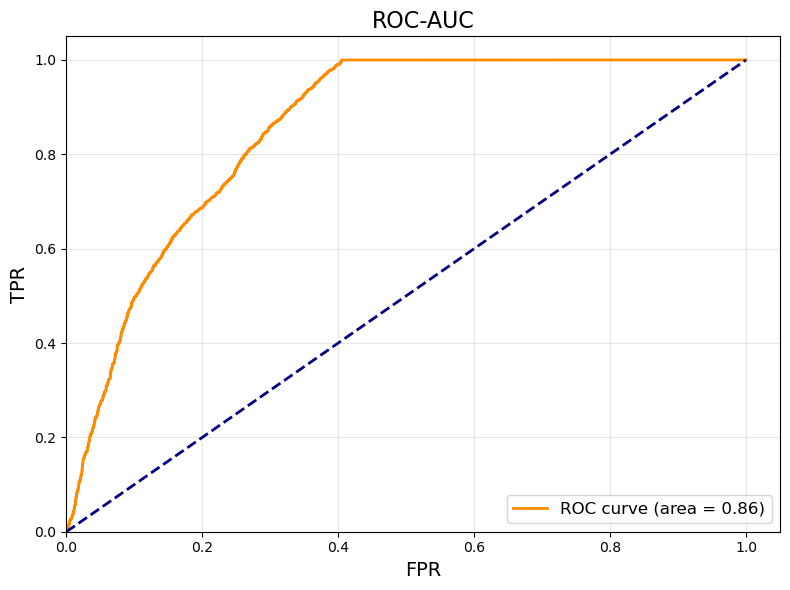

In [432]:
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr) 
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, ls='--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR', fontsize=14) 
    plt.ylabel('TPR', fontsize=14) 
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right", fontsize='large')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
plot_roc_curve(y_test_s,logt_pred_s, title='ROC-AUC')

## **Model Evaluation Metrics**

Below are the evaluation metrics obtained after fitting the final model:

- **Accuracy:** 0.84 (10380 samples)  
- **Macro Avg:** Precision = 0.87, Recall = 0.79, F1-Score = 0.81  
- **Weighted Avg:** Precision = 0.85, Recall = 0.84, F1-Score = 0.83 

### **Cohen Kappa Score**
- **Cohen Kappa Score:** 0.629  
The **Cohen Kappa Score** measures the agreement between the predicted and actual labels, adjusted for chance. A score of `0.629` indicates **moderate agreement**.

### **ROC AUC Score**
- **ROC AUC Score:** 0.8560  
The **ROC AUC Score** evaluates the model’s ability to distinguish between the two classes. A score of `0.8560` indicates **good performance**.

### **Confusion Matrix**
- **True Positives (TP):** 6235  
- **True Negatives (TN):** 2445  
- **False Positives (FP):** 1531  
- **False Negatives (FN):** 169 

The **Confusion Matrix** shows the number of correct and incorrect predictions for each class. The model correctly predicted 2445 instances of class 0 and 6235 instances of class 1, while it made 1531 false positives and 169 false negatives.

### **Summary**

- The model has an overall **accuracy of 84%**.  
- It performs slightly better in predicting **class 1** (F1-Score = 0.88) compared to **class 0** (F1-Score = 0.74).  
- The **ROC AUC Score** of 0.8560 indicates good **discriminatory ability**.  
- The **Cohen Kappa Score** of 0.629 suggests **moderate agreement** between predicted and actual labels.  

Overall, this model is reliable and we will use it as the **final model** for classification, especially in reducing false positives for class 0.
**final model** for classification, especially in reducing false positives for class 0.


# Regression (Price)

#### Before moving on to Modelling -- Price Column needs to be treated , We will Transform the column using yeo-johnson Transformation

In [436]:
pt = PowerTransformer()
df['Price'] = pt.fit_transform(df[['Price']])

In [437]:
# 1. Drop Price and Trusted Seller from features
x1 = df.drop(columns=['Price', 'Trusted Seller'])
y1 = df['Price']

# 2. Split data
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x1, y1, test_size=0.25, random_state=2)

Splitting the Data into Train and Test keeping train size as 75%

##### Fitting the Base Model as Linear Regression.

In [440]:
model_LR = LinearRegression()
model_LR.fit(x_train_r,y_train_r)

LinearRegression()

In [441]:
y_pred = model_LR.predict(x_test_r)

In [442]:
r2_score(y_test_r,y_pred)

0.5462997000779798

In [443]:
print(f"RMSE: {(mean_squared_error(y_test_r,y_pred))**0.5}")

RMSE: 0.6699584849079592


## Model Evaluation and Performance Improvement

### Base Model Performance
The **base model** currently gives an **R² score of 0.54** and **RMSE of 0.667**. This is a starting point, and there's room for improvement.

### Next Steps: XG-BOOST
To improve performance, we will try the **XG Boost** model.

In [445]:
model_xgb = XGBRegressor()
model_xgb.fit(x_train_r,y_train_r)

print("Model features:", model_xgb.feature_names_in_)

Model features: ['Brand' 'Movement' 'Case material' 'Bracelet material'
 'Year of production' 'Condition' 'Scope of delivery' 'Gender'
 'Availability' 'Shape' 'Face Area' 'Water resistance' 'Crystal' 'Dial'
 'Bracelet color' 'Clasp' 'Watches Sold by the Seller'
 'Active listing of the seller' 'Fast Shipper' 'Punctuality'
 'Seller Reviews']


In [446]:
y_pred_xgb = model_xgb.predict(x_test_r)

In [447]:
r2_score(y_test_r,y_pred_xgb)

0.867439624721173

In [448]:
print(f"MSE: {mean_squared_error(y_test_r,y_pred_xgb)}")
print(f"RMSE: {(mean_squared_error(y_test_r,y_pred_xgb))**0.5}")
print(f"MAE: {mean_absolute_error(y_test_r,y_pred_xgb)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_r,y_pred_xgb)}")

MSE: 0.13114158914613439
RMSE: 0.36213476655263904
MAE: 0.26269573995588497
MAPE: 1.418615471891004


In [548]:
cross_val_score(model_xgb,X=x_train_r,y=y_train_r,scoring='r2',cv=5)

array([0.87447029, 0.8726478 , 0.86989887, 0.86194802, 0.87340779])

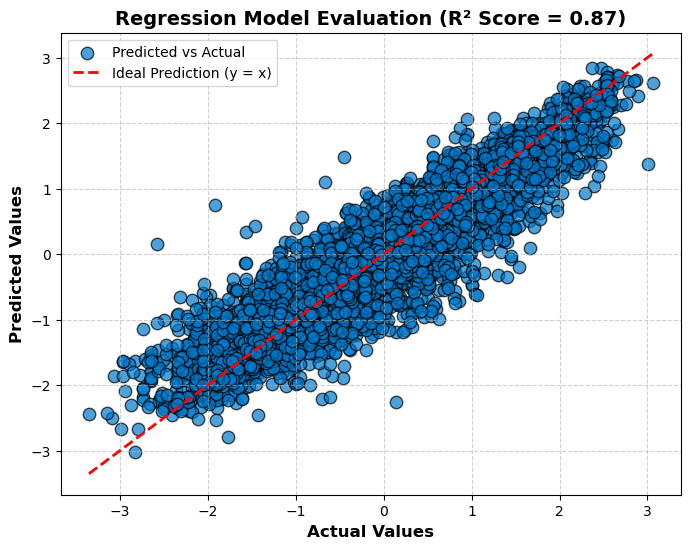

In [449]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_r, y_pred_xgb, color="#007acc", edgecolor="black", s=80, alpha=0.7, label="Predicted vs Actual")

x = np.linspace(min(y_test_r), max(y_test_r), 100)
plt.plot(x, x, color="red", ls="--", lw=2, label="Ideal Prediction (y = x)")

plt.xlabel("Actual Values", fontsize=12, fontweight="bold")
plt.ylabel("Predicted Values", fontsize=12, fontweight="bold")
plt.title(f"Regression Model Evaluation (R² Score = {r2_score(y_test_r,y_pred_xgb):.2f})", fontsize=14, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

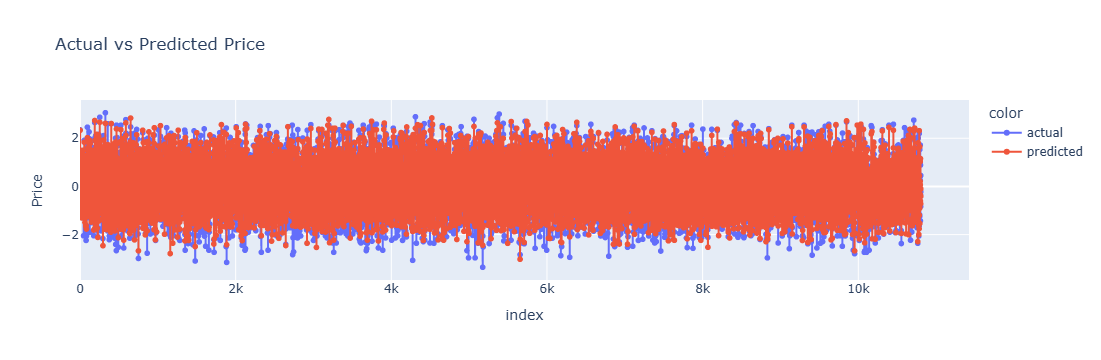

In [450]:
import plotly.graph_objects as go
import plotly.express as px


y_actual = y_test_r.reset_index()  # Actual test values (Price)
y_pred = model_xgb.predict(x_test_r)  # Predicted values from model

y_actual = pd.DataFrame(y_actual).reset_index()
y_pred = pd.DataFrame(y_pred).reset_index()

y_actual["color"] = "actual"
y_pred["color"] = "predicted"
y_pred = y_pred.rename(columns={0:'Price'})
y_actual.drop(columns='index',inplace=True)
y_actual = y_actual.rename(columns={'level_0':'index'})

df_combined = pd.concat([y_actual, y_pred])

# Create figure
fig = px.line(df_combined, x="index", y="Price", color="color", markers=True, title="Actual vs Predicted Price")


# Show plot
fig.update_xaxes(rangemode="tozero")
fig.show()

In [451]:
fig.write_html("plot.html")

# Final Model: XGBoost Regressor (Price Prediction)

Here are the results for the **XGBoost Regressor** used for price prediction:

---

## Model Performance Metrics

- **R2 Score**: 0.8694  
- **Mean Squared Error (MSE)**: 0.1311  
- **Root Mean Squared Error (RMSE)**: 0.3621  
- **Mean Absolute Error (MAE)**: 0.2627  
- **Mean Absolute Percentage Error (MAPE)**: 1.4186  

---

## Cross-Validation Scores

The **5-fold cross-validation R2 scores** are:  
`[0.8726, 0.8730, 0.8721, 0.8658, 0.8732]`  

The scores are consistent and high, so the model is **not overfitting**.

---

## Deployment

We will deploy two models:  
1. **Classification Model** (Trusted Seller or Not)  
2. **Regression Model** (Price Prediction)  

Both models are ready for use.


In [202]:
# Lets download the instances that we require to deploy
with open('transformer.pkl','wb') as file:
    pickle.dump(pt,file)

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

with open('final_model_TS.pkl','wb') as file:
    pickle.dump(model_lr_t,file)

# 5. Save the model (overwrite old file)
with open('final_model_Px.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

with open('brand_price_map.pkl', 'wb') as file:
    pickle.dump(map_dict, file)
# Save frequency encoders
with open('case_material_encoder.pkl', 'wb') as file:
    pickle.dump(case_material_counts.to_dict(), file)

with open('bracelet_material_encoder.pkl', 'wb') as file:
    pickle.dump(bracelet_material_counts.to_dict(), file)
# Save condition mapper
with open('condition_mapper.pkl', 'wb') as file:
    pickle.dump(condition_mapping, file)